In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

from matplotlib.colors import ListedColormap

from sklearn.datasets import load_wine

%matplotlib inline

In [8]:
wine = load_wine()

In [12]:
features = pd.DataFrame(wine.data,columns = wine.feature_names)
target = pd.DataFrame(wine.target, columns=["TARGET"])
data = pd.concat([features,target],axis = 1)

In [14]:
x1 = np.array(data["hue"])
x2 = np.array(data["proline"])
y = np.array(data["TARGET"])

In [25]:
x = np.column_stack((x1,x2))


In [26]:
x.shape

(178, 2)

In [27]:
scaler = MinMaxScaler()

In [29]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size = 0.2)

In [30]:
x_train = scaler.fit_transform(xtrain)
x_test = scaler.fit_transform(xtest)

In [31]:
int(np.sqrt(len(x_train)))

11

In [47]:
classifier = KNeighborsClassifier(n_neighbors=15, metric = "minkowski",p =1)

In [48]:
classifier.fit(x_train,ytrain)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=15, p=1,
           weights='uniform')

In [49]:
y_pred = classifier.predict(x_test)

In [50]:
y_pred


array([0, 2, 1, 1, 2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 1, 2, 0, 0, 1, 2, 0, 1,
       1, 0, 2, 1, 2, 1, 0, 2, 1, 1, 1, 0, 1, 1])

In [51]:
cm = confusion_matrix(ytest,y_pred)

In [52]:
cm

array([[ 6,  1,  1],
       [ 1, 15,  3],
       [ 0,  0,  9]], dtype=int64)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


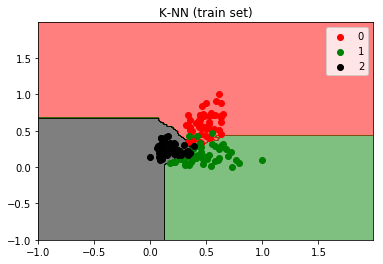

In [53]:
X_set , y_set = x_train, ytrain

X1, X2 = np.meshgrid(np.arange(start = X_set[:,0].min()-1, stop = X_set[:,0].max()+1,step = 0.01),
                    np.arange(start = X_set[:,1].min()-1, stop = X_set[:,1].max()+1,step = 0.01))

plt.contourf(X1,X2,classifier.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape),
            alpha = 0.5,cmap = ListedColormap(("red","green","black")))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i,j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j,0],X_set[y_set == j,1],
               c = ListedColormap(("red","green","black"))(i),label = j)
    
plt.title("K-NN (train set)")
plt.legend()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


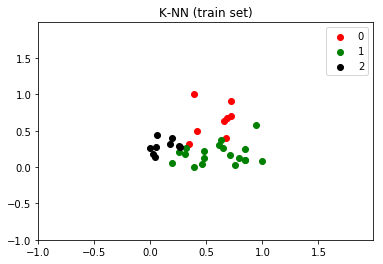

In [54]:
X_set , y_set = x_test, ytest

X1, X2 = np.meshgrid(np.arange(start = X_set[:,0].min()-1, stop = X_set[:,0].max()+1,step = 0.01),
                    np.arange(start = X_set[:,1].min()-1, stop = X_set[:,1].max()+1,step = 0.01))

# plt.contourf(X1,X2,classifier.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape),
#             alpha = 0.5,cmap = ListedColormap(("red","green","black")))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i,j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j,0],X_set[y_set == j,1],
               c = ListedColormap(("red","green","black"))(i),label = j)
    
plt.title("K-NN (train set)")
plt.legend()

In [55]:
from sklearn.metrics import accuracy_score
print(accuracy_score(ytest,y_pred))

0.8333333333333334
